In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:

# Load the dataset

df = pd.read_csv('categorized_vacancy_dataset.csv')

# Map 'DisabilityMention' to numeric
df['DisabilityMention'] = df['DisabilityMention'].map({True: 1, False: 0})

# Encode the target variable (VacancyDuration)
target = 'VacancyDuration'
df[target] = df[target].map({'Short Vacancy': 0, 'Long Vacancy': 1})

# Select features and target variable
X = df.drop(columns=['Location', 'JobCategory', 'DatePosted', 'ClosingDate', 'VacancyDuration'])
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



Bagging Classifier Accuracy: 0.9781746031746031
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95       531
           1       0.97      1.00      0.99      1989

    accuracy                           0.98      2520
   macro avg       0.99      0.95      0.97      2520
weighted avg       0.98      0.98      0.98      2520



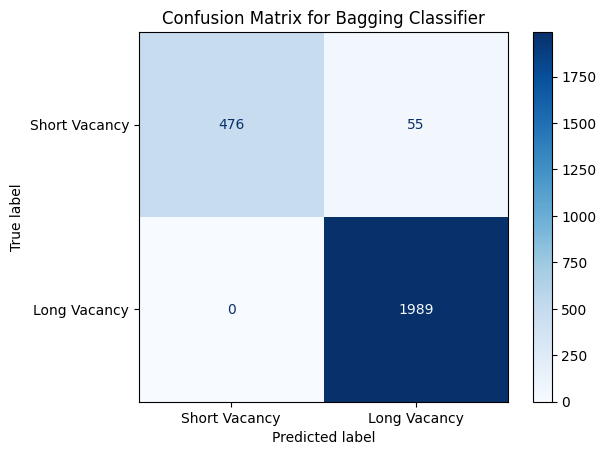

In [5]:
# Initialize Bagging Classifier with Decision Trees
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=5, random_state=42),
    n_estimators=50,
    random_state=42
)

# Train the model
bagging_model.fit(X_train, y_train)

# Predictions
y_pred = bagging_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Bagging Classifier Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
# Confusion Matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=['Short Vacancy', 'Long Vacancy'],
    cmap='Blues',
    colorbar=True
)
plt.title('Confusion Matrix for Bagging Classifier')
plt.show()

AdaBoost Classifier Accuracy: 0.9896825396825397
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       531
           1       0.99      1.00      0.99      1989

    accuracy                           0.99      2520
   macro avg       0.99      0.98      0.98      2520
weighted avg       0.99      0.99      0.99      2520



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


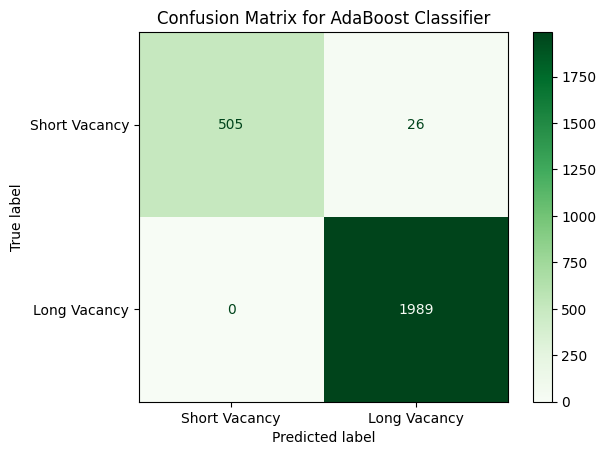

In [7]:
# Initialize AdaBoost Classifier with Decision Trees as base estimators
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# Train the AdaBoost model
adaboost_model.fit(X_train, y_train)

# Predictions
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate the model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("AdaBoost Classifier Accuracy:", accuracy_adaboost)
print("Classification Report:\n", classification_report(y_test, y_pred_adaboost))

# Confusion Matrix using ConfusionMatrixDisplay
disp_adaboost = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_adaboost,
    display_labels=['Short Vacancy', 'Long Vacancy'],
    cmap='Greens',
    colorbar=True
)
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()


Stacking Classifier Accuracy: 0.9896825396825397
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       531
           1       0.99      1.00      0.99      1989

    accuracy                           0.99      2520
   macro avg       0.99      0.98      0.98      2520
weighted avg       0.99      0.99      0.99      2520



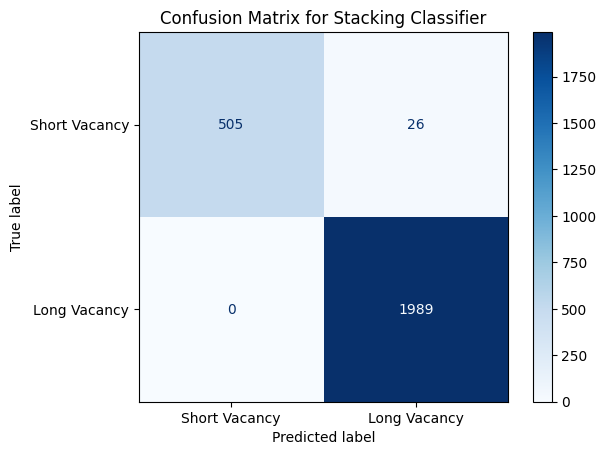

In [8]:
base_models = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('svc', SVC(kernel='linear', probability=True, random_state=42))
]

# Define meta-model
meta_model = LogisticRegression()

# Create StackingClassifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Predictions
y_pred_stacking = stacking_model.predict(X_test)

# Evaluate the stacking model
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("Stacking Classifier Accuracy:", accuracy_stacking)
print("Classification Report:\n", classification_report(y_test, y_pred_stacking))

# Confusion Matrix using ConfusionMatrixDisplay
disp_stacking = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_stacking,
    display_labels=['Short Vacancy', 'Long Vacancy'],
    cmap='Blues',
    colorbar=True
)
plt.title('Confusion Matrix for Stacking Classifier')
plt.show()
